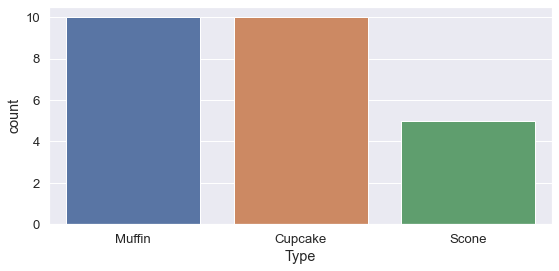

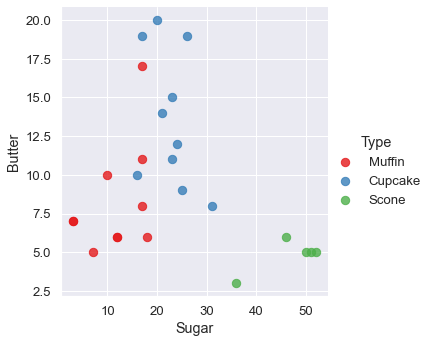

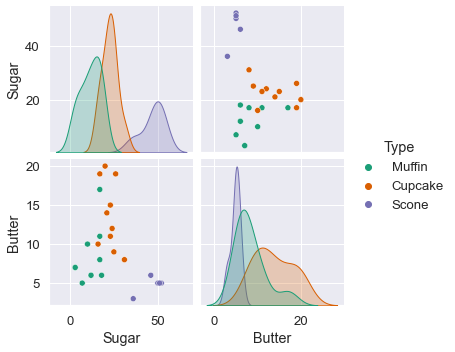

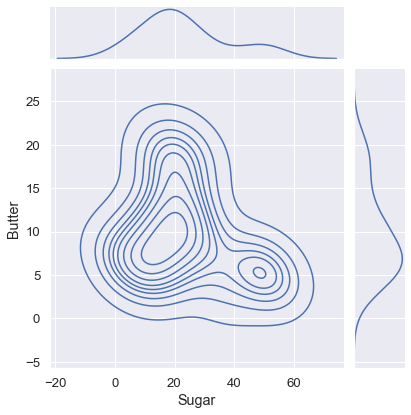

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)
from sklearn.model_selection import GridSearchCV
recipes = pd.read_csv(r'C:\Users\Brian\Downloads\recipes_muffins_cupcakes_scones.csv')
recipes
#recipes.info()
plt.figure(figsize=(8,4))
sns.countplot(x = recipes['Type'])
plt.tight_layout()
sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
sns.pairplot(recipes, vars=['Sugar','Butter'], hue='Type', palette='Dark2')
sns.jointplot(x='Sugar', y='Butter', data=recipes, kind = 'kde')
plt.show()

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

x = recipes.drop('Type', axis=1)
y = recipes['Type']
kernels = ['Polynomial', 'RBF', 'Sigmoid', 'Linear']

def getClassifier(ktype):
    if ktype == 0:
        return SVC(kernel='poly', degree=8, gamma="auto", class_weight='balanced')
    elif ktype == 1:
        return SVC(kernel='rbf', gamma="auto", class_weight='balanced')
    elif ktype == 2:
        return SVC(kernel='sigmoid', gamma="auto", class_weight='balanced')
    elif ktype == 3:
        return SVC(kernel='linear', gamma="auto", class_weight='balanced')

for i in range(4):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)
    svclassifier = getClassifier(i)
    svclassifier.fit(x_train, y_train)
    y_pred = svclassifier.predict(x_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Grid Search with StratifiedKFold
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = StratifiedKFold(n_splits=3)
    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=cv)
    grid.fit(x_train, y_train)
    print(grid.best_estimator_)
    
    grid_predictions = grid.predict(x_test)
    print(confusion_matrix(y_test, grid_predictions))
    print(classification_report(y_test, grid_predictions, zero_division=0))


Evaluation: Polynomial kernel
              precision    recall  f1-score   support

     Cupcake       0.67      1.00      0.80         2
      Muffin       1.00      0.50      0.67         2
       Scone       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.89      0.83      0.82         5
weighted avg       0.87      0.80      0.79         5

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamm

[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
SVC(C=1, gamma=0.001)
[[2 0 0]
 [0 2 0]
 [0 0 1]]
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         2
      Muffin       1.00      1.